Here is some code for importing Python modules

In [1]:
import numpy as np

import pandas as pd

import scipy as sp

import matplotlib

import matplotlib.pyplot as plt

% matplotlib inline

Here is an example of a simple graph:

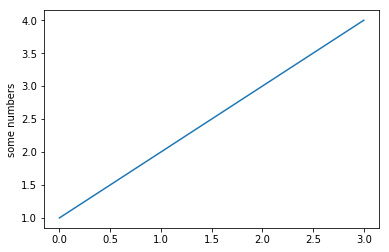

In [2]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')

Another example of graphing:

Now, to control STK:

In [3]:
import os

import win32com.client as win32

import datetime

import pandas as pd

from stk import AstrogatorOutput

In [4]:
stk_app = win32.gencache.EnsureDispatch('STK11.Application')

STK = stk_app.Personality

root = stk_app.Personality2

stk_app.Visible = True

Stop at this point, open a new scenario, get the satellite name and figure out what result value you want. 

In [5]:
g_gatorDefn = STK.scenario(0).Satellite("TestSat").GetAstrogatorDefn()

myOutputs = AstrogatorOutput()

myOutputs.add("Prop_to_apo", "Altitude", "km") 
myOutputs.add("Prop_to_apo", "Orbit_Period", "hr")
    
myOutputs.add("Prop_to_peri", "Altitude", "km")
myOutputs.add("Prop_to_peri", "Orbit_Period", "hr")
    
myOutputs.add("Maneuver", "DeltaV", "m/sec")  



In [6]:
myOutputs

In [7]:
numruns = 10

myOutputs.events



[['Prop_to_apo', 'Altitude', 'km'],
 ['Prop_to_apo', 'Orbit_Period', 'hr'],
 ['Prop_to_peri', 'Altitude', 'km'],
 ['Prop_to_peri', 'Orbit_Period', 'hr'],
 ['Maneuver', 'DeltaV', 'm/sec']]

In [8]:
myOutputs.rowNames

['Prop_to_apo Altitude (km)',
 'Prop_to_apo Orbit_Period (hr)',
 'Prop_to_peri Altitude (km)',
 'Prop_to_peri Orbit_Period (hr)',
 'Maneuver DeltaV (m/sec)']

In [9]:
maneuver = g_gatorDefn.GetSegmentByName("Maneuver")

for i in range(numruns):
    tf = maneuver.ImpulsiveMnvr.Cartesian.X.Set(10*i, "m/sec")
    tf = g_gatorDefn.RunMCS()
    myOutputs.update(g_gatorDefn,i)
    
    #results[i,0] = peri.GetResultValue("Altitude").Getin("km").value
    #results[i,1] = apo.GetResultValue("Altitude").Getin("km").value
    #results[i,2] = maneuver.GetResultValue("DeltaV").Getin("m/sec").value

[[ 299.45525576]
 [   1.50854965]
 [ 283.36851471]
 [   1.50864494]
 [   0.        ]]
(5, 1)
[[ 334.2027021 ]
 [   1.51442278]
 [ 283.36851471]
 [   1.50864494]
 [  10.        ]]
(5, 1)
[[ 369.16627089]
 [   1.52033924]
 [ 283.36851471]
 [   1.50864494]
 [  20.        ]]
(5, 1)
[[ 404.35249528]
 [   1.52629969]
 [ 283.36851471]
 [   1.50864494]
 [  30.        ]]
(5, 1)
[[ 439.76546127]
 [   1.53230559]
 [ 283.36851471]
 [   1.50864494]
 [  40.        ]]
(5, 1)
[[ 475.40842812]
 [   1.53835807]
 [ 283.36851471]
 [   1.50864494]
 [  50.        ]]
(5, 1)
[[ 511.28428692]
 [   1.54445803]
 [ 283.36851471]
 [   1.50864494]
 [  60.        ]]
(5, 1)
[[ 547.39573361]
 [   1.55060624]
 [ 283.36851471]
 [   1.50864494]
 [  70.        ]]
(5, 1)
[[ 583.74535483]
 [   1.55680338]
 [ 283.36851471]
 [   1.50864494]
 [  80.        ]]
(5, 1)
[[ 620.33568303]
 [   1.56305012]
 [ 283.36851471]
 [   1.50864494]
 [  90.        ]]
(5, 1)


In [10]:
s = np.zeros([5,3])
print(s)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


And that's all!

In [11]:
myOutputs.results

array([[ 299.45525576,  334.2027021 ,  369.16627089,  404.35249528,
         439.76546127,  475.40842812,  511.28428692,  547.39573361,
         583.74535483,  620.33568303],
       [   1.50854965,    1.51442278,    1.52033924,    1.52629969,
           1.53230559,    1.53835807,    1.54445803,    1.55060624,
           1.55680338,    1.56305012],
       [ 283.36851471,  283.36851471,  283.36851471,  283.36851471,
         283.36851471,  283.36851471,  283.36851471,  283.36851471,
         283.36851471,  283.36851471],
       [   1.50864494,    1.50864494,    1.50864494,    1.50864494,
           1.50864494,    1.50864494,    1.50864494,    1.50864494,
           1.50864494,    1.50864494],
       [   0.        ,   10.        ,   20.        ,   30.        ,
          40.        ,   50.        ,   60.        ,   70.        ,
          80.        ,   90.        ]])

In [12]:
np.savetxt("test.csv",myOutputs.results, delimiter=",")

In [13]:
!more "test.csv"

2.994552557572151841e+02,3.342027021048804727e+02,3.691662708874567898e+02,4.043524952832062809e+02,4.397654612676524835e+02,4.754084281201120916e+02,5.112842869180541356e+02,5.473957336060691432e+02,5.837453548348006507e+02,6.203356830306937582e+02
1.508549653576496841e+00,1.514422779846434253e+00,1.520339236708936781e+00,1.526299688071474092e+00,1.532305589706855375e+00,1.538358069662434602e+00,1.544458030450613473e+00,1.550606237672015775e+00,1.556803384578848704e+00,1.563050117720149679e+00
2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02,2.833685147058580469e+02
1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00,1.508644935397687403e+00


In [14]:
myOutputs.df

,Prop_to_apo Altitude (km),Prop_to_apo Orbit_Period (hr),Prop_to_peri Altitude (km),Prop_to_peri Orbit_Period (hr),Maneuver DeltaV (m/sec)
0,299.455256,1.508550,283.368515,1.508645,0.0
1,334.202702,1.514423,283.368515,1.508645,10.0
2,369.166271,1.520339,283.368515,1.508645,20.0
3,404.352495,1.526300,283.368515,1.508645,30.0
4,439.765461,1.532306,283.368515,1.508645,40.0
5,475.408428,1.538358,283.368515,1.508645,50.0
6,511.284287,1.544458,283.368515,1.508645,60.0
7,547.395734,1.550606,283.368515,1.508645,70.0
8,583.745355,1.556803,283.368515,1.508645,80.0
9,620.335683,1.563050,283.368515,1.508645,90.0


In [15]:
a = myOutputs.df

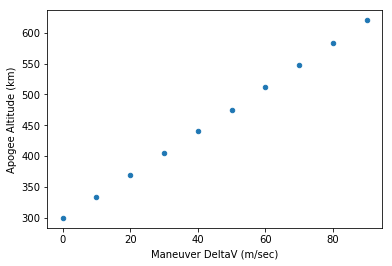

In [16]:
ax = a.plot.scatter('Maneuver DeltaV (m/sec)', 'Prop_to_apo Altitude (km)')
ax.set_ylabel('Apogee Altitude (km)')

In [17]:
a.transpose()

,0,1,2,3,4,5,6,7,8,9
Prop_to_apo Altitude (km),299.455256,334.202702,369.166271,404.352495,439.765461,475.408428,511.284287,547.395734,583.745355,620.335683
Prop_to_apo Orbit_Period (hr),1.508550,1.514423,1.520339,1.526300,1.532306,1.538358,1.544458,1.550606,1.556803,1.563050
Prop_to_peri Altitude (km),283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515
Prop_to_peri Orbit_Period (hr),1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645
Maneuver DeltaV (m/sec),0.000000,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DAD9ACB588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002DAD9C5ABA8>], dtype=object)

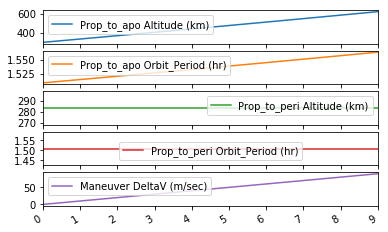

In [18]:
a.plot(subplots=True)

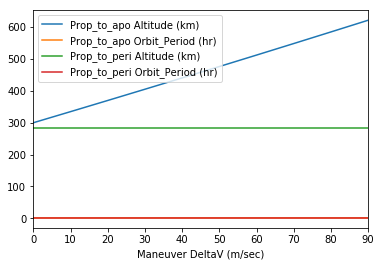

In [19]:
a.plot.line("Maneuver DeltaV (m/sec)")

In [20]:
myOutputs.saveCSV("dataFrame.csv")

In [22]:
b = AstrogatorOutput.loadCSV("dataFrame.csv")

In [23]:
b._df

,0,1,2,3,4,5,6,7,8,9
Prop_to_apo Altitude (km),299.455256,334.202702,369.166271,404.352495,439.765461,475.408428,511.284287,547.395734,583.745355,620.335683
Prop_to_apo Orbit_Period (hr),1.508550,1.514423,1.520339,1.526300,1.532306,1.538358,1.544458,1.550606,1.556803,1.563050
Prop_to_peri Altitude (km),283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515,283.368515
Prop_to_peri Orbit_Period (hr),1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645,1.508645
Maneuver DeltaV (m/sec),0.000000,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000


In [24]:
b.rowNames

['Prop_to_apo Altitude (km)',
 'Prop_to_apo Orbit_Period (hr)',
 'Prop_to_peri Altitude (km)',
 'Prop_to_peri Orbit_Period (hr)',
 'Maneuver DeltaV (m/sec)']

In [25]:
b.events

[['Prop_to_apo', 'Altitude', 'km'],
 ['Prop_to_apo', 'Orbit_Period', 'hr'],
 ['Prop_to_peri', 'Altitude', 'km'],
 ['Prop_to_peri', 'Orbit_Period', 'hr'],
 ['Maneuver', 'DeltaV', 'm/sec']]

In [26]:
myOutputs.events

[['Prop_to_apo', 'Altitude', 'km'],
 ['Prop_to_apo', 'Orbit_Period', 'hr'],
 ['Prop_to_peri', 'Altitude', 'km'],
 ['Prop_to_peri', 'Orbit_Period', 'hr'],
 ['Maneuver', 'DeltaV', 'm/sec']]